In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K

In [2]:
# load saved df
df = pd.read_pickle('test.pkl')
print (df.keys())

Index([      b'pt_of_muon',      b'eta_of_muon',      b'phi_of_muon',
         b'energy_of_muon',        b'hcal_ieta',        b'hcal_iphi',
           b'IsolationR04',     b'IsolationR03',      b'ecal_3into3',
            b'hcal_3into3',         b'ecal_3x3',         b'hcal_1x1',
       'b'hcal_edepth1'_x', 'b'hcal_edepth2'_x', 'b'hcal_edepth3'_x',
       'b'hcal_edepth4'_x', 'b'hcal_edepth5'_x', 'b'hcal_edepth6'_x',
       'b'hcal_edepth7'_x', 'b'hcal_edepth1'_y', 'b'hcal_edepth2'_y',
       'b'hcal_edepth3'_y', 'b'hcal_edepth4'_y', 'b'hcal_edepth5'_y',
       'b'hcal_edepth6'_y', 'b'hcal_edepth7'_y'],
      dtype='object')


In [3]:
# filter events
ieta=27
df = df.loc[abs(df[b'hcal_ieta']) == ieta]

df = df.loc[df["b'hcal_edepth1'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth1'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth2'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth2'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth3'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth3'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth4'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth4'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth5'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth5'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth6'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth6'_y"] > 0.00001]

if ieta in range (26,28):
    df = df.loc[df["b'hcal_edepth7'_x"] > 0.00001]
    df = df.loc[df["b'hcal_edepth7'_y"] > 0.00001]

In [4]:
df["b'hcal_edepth1'_x"]=np.log(10000*df["b'hcal_edepth1'_x"])
df["b'hcal_edepth1'_y"]=np.log(10000*df["b'hcal_edepth1'_y"])

df["b'hcal_edepth2'_x"]=np.log(10000*df["b'hcal_edepth2'_x"])
df["b'hcal_edepth2'_y"]=np.log(10000*df["b'hcal_edepth2'_y"])

df["b'hcal_edepth3'_x"]=np.log(10000*df["b'hcal_edepth3'_x"])
df["b'hcal_edepth3'_y"]=np.log(10000*df["b'hcal_edepth3'_y"])

df["b'hcal_edepth4'_x"]=np.log(10000*df["b'hcal_edepth4'_x"])
df["b'hcal_edepth4'_y"]=np.log(10000*df["b'hcal_edepth4'_y"])

df["b'hcal_edepth5'_x"]=np.log(10000*df["b'hcal_edepth5'_x"])
df["b'hcal_edepth5'_y"]=np.log(10000*df["b'hcal_edepth5'_y"])

df["b'hcal_edepth6'_x"]=np.log(10000*df["b'hcal_edepth6'_x"])
df["b'hcal_edepth6'_y"]=np.log(10000*df["b'hcal_edepth6'_y"])

if ieta in range (26,28):
    df["b'hcal_edepth7'_x"]=np.log(10000*df["b'hcal_edepth7'_x"])
    df["b'hcal_edepth7'_y"]=np.log(10000*df["b'hcal_edepth7'_y"])

In [5]:
# keep originals before scaling
df['hcal_edepth1_un'] = df["b'hcal_edepth1'_x"]
df['hcal_edepth2_un'] = df["b'hcal_edepth2'_x"]
df['hcal_edepth3_un'] = df["b'hcal_edepth3'_x"]
df['hcal_edepth4_un'] = df["b'hcal_edepth4'_x"]
df['hcal_edepth5_un'] = df["b'hcal_edepth5'_x"]
df['hcal_edepth6_un'] = df["b'hcal_edepth6'_x"]
df['hcal_edepth7_un'] = df["b'hcal_edepth7'_x"]

df['hcal_ieta_un'] = df[b'hcal_ieta']

In [6]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_edepth1'_x", "b'hcal_edepth2'_x", "b'hcal_edepth3'_x",
               "b'hcal_edepth4'_x", "b'hcal_edepth5'_x", "b'hcal_edepth6'_x",
               "b'hcal_edepth7'_x"]


df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


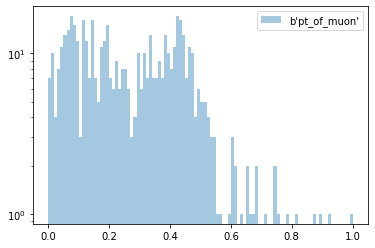

b'eta_of_muon'


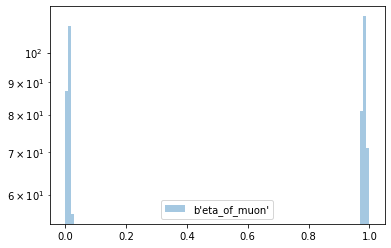

b'phi_of_muon'


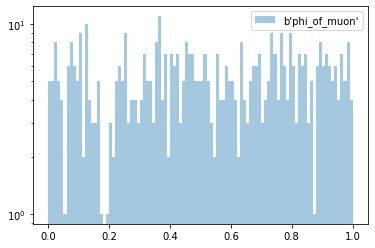

b'energy_of_muon'


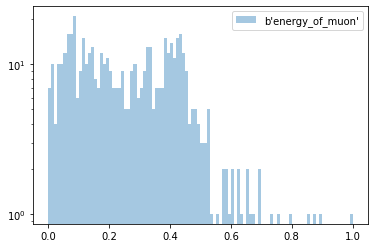

b'hcal_ieta'


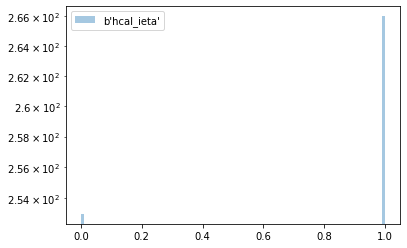

b'hcal_iphi'


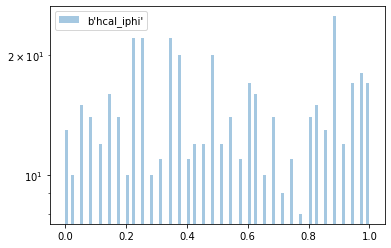

b'IsolationR04'


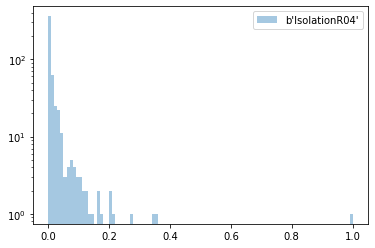

b'IsolationR03'


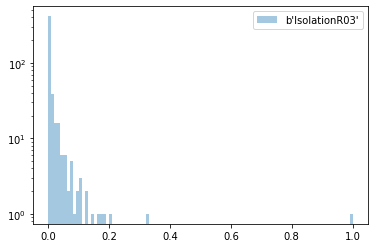

b'ecal_3into3'


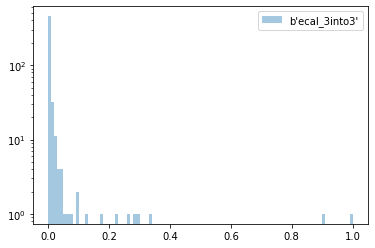

b'hcal_3into3'


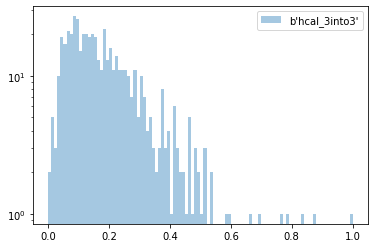

b'ecal_3x3'


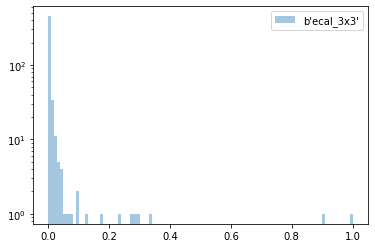

b'hcal_1x1'


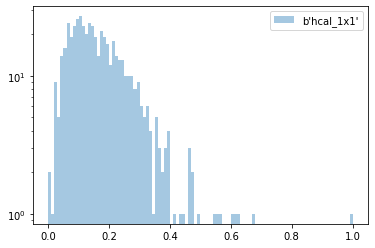

b'hcal_edepth1'_x


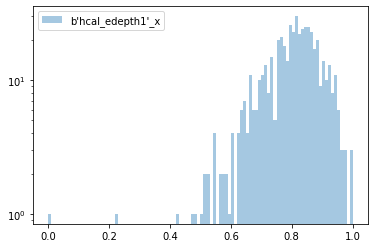

b'hcal_edepth2'_x


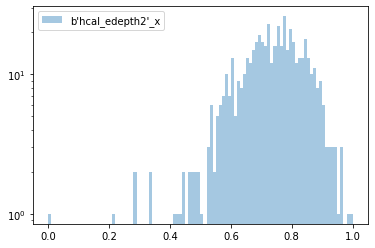

b'hcal_edepth3'_x


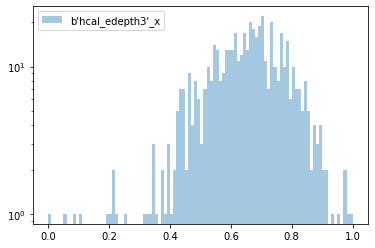

b'hcal_edepth4'_x


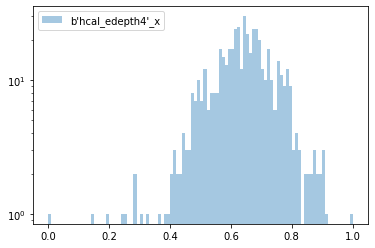

b'hcal_edepth5'_x


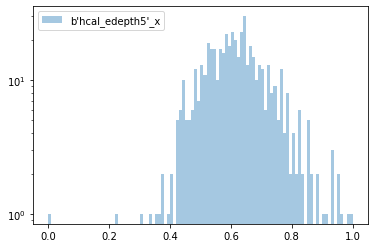

b'hcal_edepth6'_x


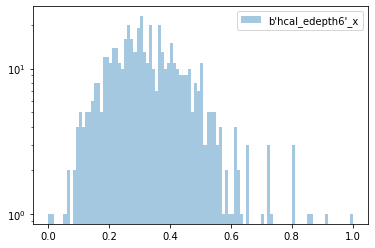

b'hcal_edepth7'_x


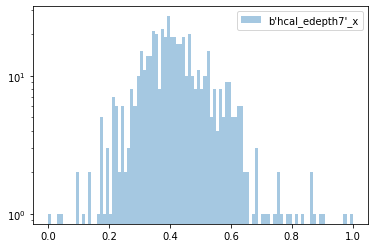

b'hcal_edepth1'_y


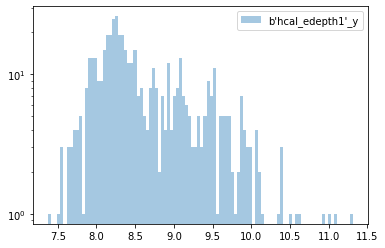

b'hcal_edepth2'_y


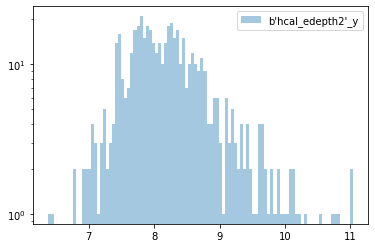

b'hcal_edepth3'_y


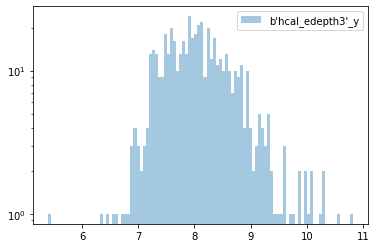

b'hcal_edepth4'_y


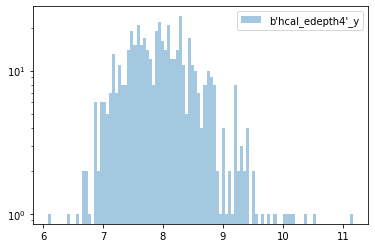

b'hcal_edepth5'_y


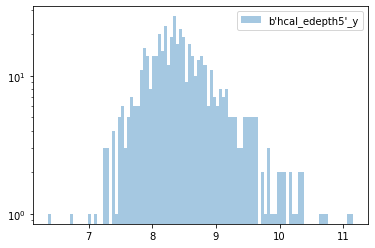

b'hcal_edepth6'_y


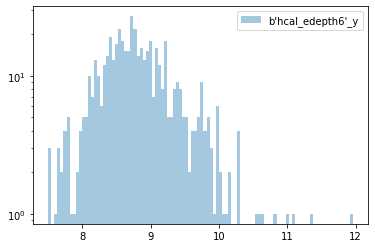

b'hcal_edepth7'_y


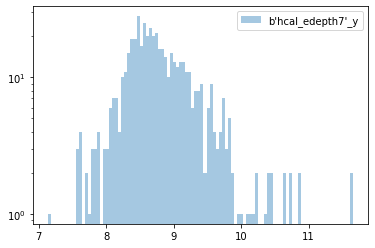

hcal_edepth1_un


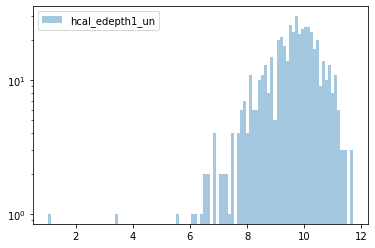

hcal_edepth2_un


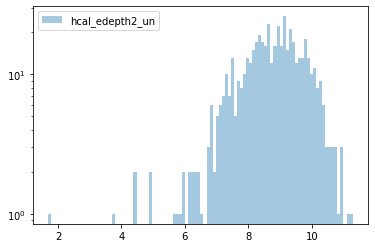

hcal_edepth3_un


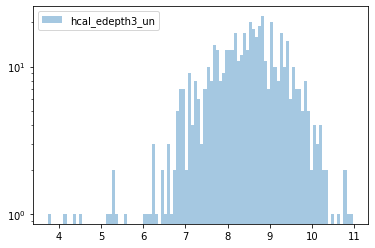

hcal_edepth4_un


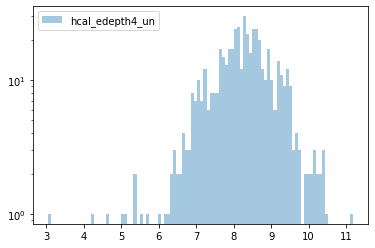

hcal_edepth5_un


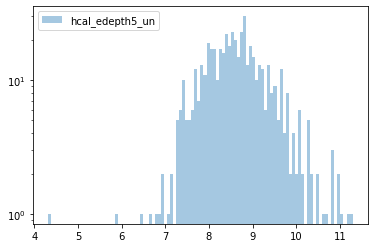

hcal_edepth6_un


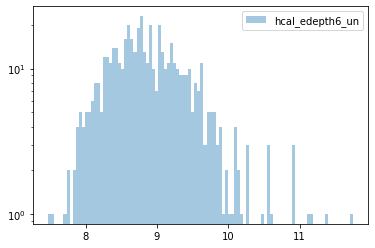

hcal_edepth7_un


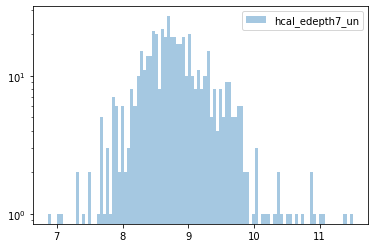

hcal_ieta_un


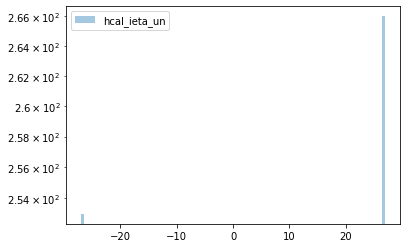

In [7]:
for i in (df.keys()):
    print (i)
    if ieta not in range (26,28):
        if i == "b'hcal_edepth7'_x":
            continue
        if i == "b'hcal_edepth7'_y":
            continue
        if i == "b'hcal_edepth7'_un":
            continue
    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [9]:
#print(df.keys)
data = df.values
print (data.shape[0])
ntest = 100
testindx = data.shape[0] - ntest
X_train_depth1 = data[:testindx,np.r_[0:12,12]]   
X_train_depth2 = data[:testindx,np.r_[0:12,13]] 
X_train_depth3 = data[:testindx,np.r_[0:12,14]] 
X_train_depth4 = data[:testindx,np.r_[0:12,15]] 
X_train_depth5 = data[:testindx,np.r_[0:12,16]] 
X_train_depth6 = data[:testindx,np.r_[0:12,17]] 
X_train_depth7 = data[:testindx,np.r_[0:12,18]]

Y_train_depth1 = data[:testindx,19]
Y_train_depth2 = data[:testindx,20]
Y_train_depth3 = data[:testindx,21]
Y_train_depth4 = data[:testindx,22]
Y_train_depth5 = data[:testindx,23]
Y_train_depth6 = data[:testindx,24]
Y_train_depth7 = data[:testindx,25]

X_test = data[testindx:,:]
#print(X_test)
print (X_test.shape) 
print ("shape of X_train_depth1:",X_train_depth1.shape)
#print ("shape of X_train_depth2:",X_train_depth2.shape)
print ("shape of Y_train_depth2:",Y_train_depth1.shape)


519
(100, 34)
shape of X_train_depth1: (419, 13)
shape of Y_train_depth2: (419,)


true_hist_depth1[0] =  [169 164  79   7]
sum weight_depth1: 100.0
true_hist_depth1 [169 164  79   7]
weight_vals_depth1: [ 3.53199817  3.63968104  7.55579355 85.27252724]


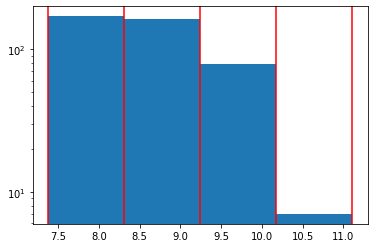

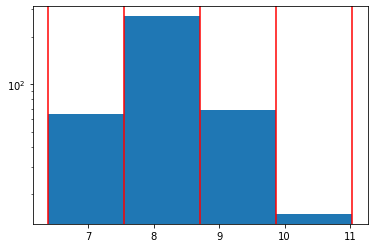

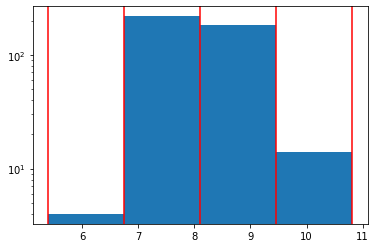

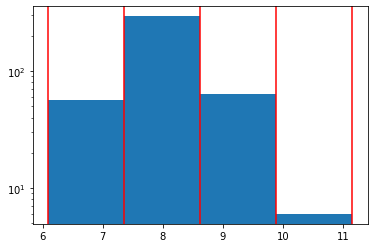

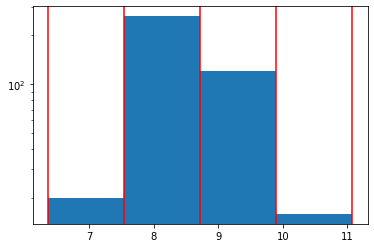

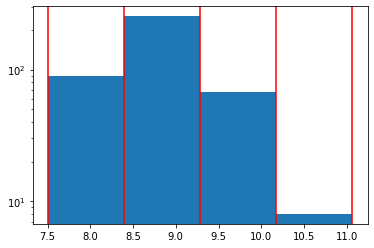

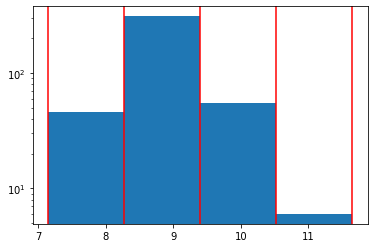

In [10]:
# sample weights
histoAR_depth1 = Y_train_depth1.copy()
histoAR_depth2 = Y_train_depth2.copy()
histoAR_depth3 = Y_train_depth3.copy()
histoAR_depth4 = Y_train_depth4.copy()
histoAR_depth5 = Y_train_depth5.copy()
histoAR_depth6 = Y_train_depth6.copy()
histoAR_depth7 = Y_train_depth7.copy()

nbins = 4 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt

true_hist_depth1 = np.histogram(histoAR_depth1,bins = nbins,
                                range=(np.min(Y_train_depth1)-0.001,np.max(Y_train_depth1)+0.001))
true_hist_depth2 = np.histogram(histoAR_depth2,bins = nbins,
                                range=(np.min(Y_train_depth2)-0.001,np.max(Y_train_depth2)+0.001))
true_hist_depth3 = np.histogram(histoAR_depth3,bins = nbins,
                                range=(np.min(Y_train_depth3)-0.001,np.max(Y_train_depth3)+0.001))
true_hist_depth4 = np.histogram(histoAR_depth4,bins = nbins,
                                range=(np.min(Y_train_depth4)-0.001,np.max(Y_train_depth4)+0.001))
true_hist_depth5 = np.histogram(histoAR_depth5,bins = nbins,
                                range=(np.min(Y_train_depth5)-0.001,np.max(Y_train_depth5)+0.001))
true_hist_depth6 = np.histogram(histoAR_depth6,bins = nbins,
                                range=(np.min(Y_train_depth6)-0.001,np.max(Y_train_depth6)+0.001))
true_hist_depth7 = np.histogram(histoAR_depth7,bins = nbins,
                                range=(np.min(Y_train_depth7)-0.001,np.max(Y_train_depth7)+0.001))


binweight_depth1 = true_hist_depth1[0][np.digitize(histoAR_depth1,true_hist_depth1[1]) - 1]
binweight_depth2 = true_hist_depth2[0][np.digitize(histoAR_depth2,true_hist_depth2[1]) - 1]
binweight_depth3 = true_hist_depth3[0][np.digitize(histoAR_depth3,true_hist_depth3[1]) - 1]
binweight_depth4 = true_hist_depth4[0][np.digitize(histoAR_depth4,true_hist_depth4[1]) - 1]
binweight_depth5 = true_hist_depth5[0][np.digitize(histoAR_depth5,true_hist_depth5[1]) - 1]
binweight_depth6 = true_hist_depth6[0][np.digitize(histoAR_depth6,true_hist_depth6[1]) - 1]
binweight_depth7 = true_hist_depth7[0][np.digitize(histoAR_depth7,true_hist_depth7[1]) - 1]


print ("true_hist_depth1[0] = ", true_hist_depth1[0])

binweight_depth1 = 1/binweight_depth1
binweight_depth2 = 1/binweight_depth2
binweight_depth3 = 1/binweight_depth3
binweight_depth4 = 1/binweight_depth4
binweight_depth5 = 1/binweight_depth5
binweight_depth6 = 1/binweight_depth6
binweight_depth7 = 1/binweight_depth7

binweight_depth1 = 100*binweight_depth1/np.sum(np.unique(binweight_depth1)) ## 5000/5 ok
binweight_depth2 = 100*binweight_depth2/np.sum(np.unique(binweight_depth2))
binweight_depth3 = 100*binweight_depth3/np.sum(np.unique(binweight_depth3))
binweight_depth4 = 100*binweight_depth4/np.sum(np.unique(binweight_depth4))
binweight_depth5 = 100*binweight_depth5/np.sum(np.unique(binweight_depth5))
binweight_depth6 = 100*binweight_depth6/np.sum(np.unique(binweight_depth6))
binweight_depth7 = 100*binweight_depth7/np.sum(np.unique(binweight_depth7))


print("sum weight_depth1:",np.sum(np.unique(binweight_depth1)))
print("true_hist_depth1",true_hist_depth1[0])
#print("binweight_depth1",binweight_depth1)
print("weight_vals_depth1:",np.unique(binweight_depth1))

if ieta in range (26,28):
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6, binweight_depth7]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5,
               histoAR_depth6, histoAR_depth7]
    
    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1], true_hist_depth7[1]]
    
    for i in range (0,7):
        plt.hist(histoAR[i],bins=nbins)
        
        for j in true_hist[i]:
            plt.axvline(j,color='r')
        
        plt.yscale("log")
        plt.show()
else:
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5, 
               histoAR_depth6]

    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1]]


    for i in range (0,6):
        plt.hist(histoAR[i],bins=nbins)

        for j in true_hist[i]:
            plt.axvline(j,color='r')
        plt.yscale("log")
        plt.show()

In [11]:
import keras.backend as kb
def custom_loss_depth(preds, targets):
    return (kb.square(preds-targets))


In [12]:
PYTHONHASHSEED=0
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

print ("creating model=========>")

input1=Input(shape=(X_train_depth1.shape[1],))
input2=Input(shape=(X_train_depth2.shape[1],))
input3=Input(shape=(X_train_depth3.shape[1],))
input4=Input(shape=(X_train_depth4.shape[1],))
input5=Input(shape=(X_train_depth5.shape[1],))
input6=Input(shape=(X_train_depth6.shape[1],))
if ieta in range (26,28):
    input7=Input(shape=(X_train_depth7.shape[1],))

x1 = Dense(16, activation="relu")(input1)
x1 = Dense(8, activation="relu")(x1)
x1 = Dense(4, activation="relu")(x1)
x1 = Model(inputs=input1, outputs=x1)
x2 = Dense(32, activation="relu")(input2)
x2 = Dense(16, activation="relu")(x2)
x2 = Dense(4, activation="relu")(x2)
x2 = Model(inputs=input2, outputs=x2)
x3 = Dense(32, activation="relu")(input3)
x3 = Dense(16, activation="relu")(x3)
x3 = Dense(4, activation="relu")(x3)
x3 = Model(inputs=input3, outputs=x3)
x4 = Dense(32, activation="relu")(input4)
x4 = Dense(16, activation="relu")(x4)
x4 = Dense(4, activation="relu")(x4)
x4 = Model(inputs=input4, outputs=x4)
x5 = Dense(64, activation="relu")(input5)
x5 = Dense(16, activation="relu")(x5)
x5 = Dense(4, activation="relu")(x5)
x5 = Model(inputs=input5, outputs=x5)
x6 = Dense(32, activation="relu")(input6)
x6 = Dense(16, activation="relu")(x6)
x6 = Dense(4, activation="relu")(x6)
x6 = Model(inputs=input6, outputs=x6)
if ieta in range (26,28):
    x7 = Dense(32, activation="relu")(input7)
    x7 = Dense(16, activation="relu")(x7)
    x7 = Dense(4, activation="relu")(x7)
    x7 = Model(inputs=input7, outputs=x7)

if ieta in range (26,28):
    n=7
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, 
                                              x5.output, x6.output, x7.output])
else:
    n=6
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, x5.output, x6.output])

z1 = Dense(64, activation="relu")(combined)
z1 = Dense(16, activation="relu")(z1)
z1 = Dense(n)(z1)


if ieta in range (26,28):
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input, x7.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6, X_train_depth7], [Y_train_depth1, Y_train_depth2, Y_train_depth3, 
                         Y_train_depth4, Y_train_depth5, Y_train_depth6, Y_train_depth7], batch_size=4000, 
                         epochs=1500, validation_split=0.2, verbose=1,sample_weight=binweight)
else:
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6],[Y_train_depth1, Y_train_depth2, Y_train_depth3, Y_train_depth4,
                         Y_train_depth5, Y_train_depth6] , batch_size=4000, epochs=1500, validation_split=0.2, 
                         verbose=1,sample_weight=binweight)

creating model=========>
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 13)]         0                                            
___________________________________________________________________

1/1 [==============================] - 0s 35ms/step - loss: 498.0600 - val_loss: 436.1085
Epoch 9/1500
1/1 [==============================] - 0s 33ms/step - loss: 496.5056 - val_loss: 434.7165
Epoch 10/1500
1/1 [==============================] - 0s 33ms/step - loss: 494.9078 - val_loss: 433.3000
Epoch 11/1500
1/1 [==============================] - 0s 33ms/step - loss: 493.2476 - val_loss: 431.8551
Epoch 12/1500
1/1 [==============================] - 0s 33ms/step - loss: 491.5680 - val_loss: 430.3622
Epoch 13/1500
1/1 [==============================] - 0s 33ms/step - loss: 489.8480 - val_loss: 428.8091
Epoch 14/1500
1/1 [==============================] - 0s 34ms/step - loss: 488.0510 - val_loss: 427.1920
Epoch 15/1500
1/1 [==============================] - 0s 33ms/step - loss: 486.1806 - val_loss: 425.4875
Epoch 16/1500
1/1 [==============================] - 0s 33ms/step - loss: 484.2137 - val_loss: 423.6755
Epoch 17/1500
1/1 [==============================] - 0s 33ms/step - loss: 482.1

Epoch 87/1500
1/1 [==============================] - 0s 35ms/step - loss: 92.2209 - val_loss: 82.6853
Epoch 88/1500
1/1 [==============================] - 0s 35ms/step - loss: 89.3399 - val_loss: 80.0845
Epoch 89/1500
1/1 [==============================] - 0s 34ms/step - loss: 86.5521 - val_loss: 77.5656
Epoch 90/1500
1/1 [==============================] - 0s 34ms/step - loss: 83.8601 - val_loss: 75.1286
Epoch 91/1500
1/1 [==============================] - 0s 34ms/step - loss: 81.2594 - val_loss: 72.7773
Epoch 92/1500
1/1 [==============================] - 0s 33ms/step - loss: 78.7400 - val_loss: 70.5059
Epoch 93/1500
1/1 [==============================] - 0s 33ms/step - loss: 76.2919 - val_loss: 68.3094
Epoch 94/1500
1/1 [==============================] - 0s 33ms/step - loss: 73.9013 - val_loss: 66.1832
Epoch 95/1500
1/1 [==============================] - 0s 33ms/step - loss: 71.5563 - val_loss: 64.1181
Epoch 96/1500
1/1 [==============================] - 0s 33ms/step - loss: 69.2188 

1/1 [==============================] - 0s 35ms/step - loss: 5.3894 - val_loss: 8.3097
Epoch 168/1500
1/1 [==============================] - 0s 33ms/step - loss: 5.3615 - val_loss: 8.2809
Epoch 169/1500
1/1 [==============================] - 0s 33ms/step - loss: 5.3337 - val_loss: 8.2479
Epoch 170/1500
1/1 [==============================] - 0s 33ms/step - loss: 5.3061 - val_loss: 8.2120
Epoch 171/1500
1/1 [==============================] - 0s 33ms/step - loss: 5.2788 - val_loss: 8.1753
Epoch 172/1500
1/1 [==============================] - 0s 32ms/step - loss: 5.2522 - val_loss: 8.1423
Epoch 173/1500
1/1 [==============================] - 0s 33ms/step - loss: 5.2265 - val_loss: 8.1142
Epoch 174/1500
1/1 [==============================] - 0s 32ms/step - loss: 5.2012 - val_loss: 8.0896
Epoch 175/1500
1/1 [==============================] - 0s 33ms/step - loss: 5.1762 - val_loss: 8.0684
Epoch 176/1500
1/1 [==============================] - 0s 32ms/step - loss: 5.1514 - val_loss: 8.0492
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 3.7945 - val_loss: 6.8755
Epoch 249/1500
1/1 [==============================] - 0s 34ms/step - loss: 3.7796 - val_loss: 6.8678
Epoch 250/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.7648 - val_loss: 6.8595
Epoch 251/1500
1/1 [==============================] - 0s 32ms/step - loss: 3.7502 - val_loss: 6.8516
Epoch 252/1500
1/1 [==============================] - 0s 32ms/step - loss: 3.7358 - val_loss: 6.8464
Epoch 253/1500
1/1 [==============================] - 0s 32ms/step - loss: 3.7215 - val_loss: 6.8436
Epoch 254/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.7072 - val_loss: 6.8414
Epoch 255/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.6933 - val_loss: 6.8383
Epoch 256/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.6795 - val_loss: 6.8343
Epoch 257/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.6658 - val_loss: 6.8297
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 2.9740 - val_loss: 7.0817
Epoch 330/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.9650 - val_loss: 7.1246
Epoch 331/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9606 - val_loss: 7.1223
Epoch 332/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.9522 - val_loss: 7.0866
Epoch 333/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9424 - val_loss: 7.0852
Epoch 334/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9352 - val_loss: 7.0888
Epoch 335/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9279 - val_loss: 7.0977
Epoch 336/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9203 - val_loss: 7.1041
Epoch 337/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9127 - val_loss: 7.1048
Epoch 338/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9051 - val_loss: 7.1118
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 2.5130 - val_loss: 7.3236
Epoch 411/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.5092 - val_loss: 7.3096
Epoch 412/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.5045 - val_loss: 7.2847
Epoch 413/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.5004 - val_loss: 7.2991
Epoch 414/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.4954 - val_loss: 7.2944
Epoch 415/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.4911 - val_loss: 7.3101
Epoch 416/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.4865 - val_loss: 7.2987
Epoch 417/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.4824 - val_loss: 7.2712
Epoch 418/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.4790 - val_loss: 7.2813
Epoch 419/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.4735 - val_loss: 7.3124
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 2.1815 - val_loss: 6.7631
Epoch 492/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1770 - val_loss: 6.7056
Epoch 493/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1752 - val_loss: 6.6899
Epoch 494/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1723 - val_loss: 6.7083
Epoch 495/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1690 - val_loss: 6.7165
Epoch 496/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1658 - val_loss: 6.6948
Epoch 497/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1609 - val_loss: 6.6739
Epoch 498/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1581 - val_loss: 6.6843
Epoch 499/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1565 - val_loss: 6.6773
Epoch 500/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1531 - val_loss: 6.6474
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 1.9411 - val_loss: 6.3070
Epoch 573/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.9405 - val_loss: 6.3258
Epoch 574/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9376 - val_loss: 6.2873
Epoch 575/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9334 - val_loss: 6.2755
Epoch 576/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9316 - val_loss: 6.3535
Epoch 577/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9298 - val_loss: 6.3738
Epoch 578/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9296 - val_loss: 6.2643
Epoch 579/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9272 - val_loss: 6.2239
Epoch 580/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9267 - val_loss: 6.2857
Epoch 581/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9203 - val_loss: 6.3544
Epoch

1/1 [==============================] - 0s 34ms/step - loss: 1.7450 - val_loss: 5.9866
Epoch 654/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.7421 - val_loss: 5.9770
Epoch 655/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.7399 - val_loss: 5.9687
Epoch 656/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.7374 - val_loss: 5.9771
Epoch 657/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.7361 - val_loss: 6.0092
Epoch 658/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.7344 - val_loss: 5.9498
Epoch 659/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7313 - val_loss: 5.9367
Epoch 660/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.7293 - val_loss: 5.9595
Epoch 661/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.7250 - val_loss: 5.9718
Epoch 662/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7255 - val_loss: 5.8918
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.5670 - val_loss: 5.4065
Epoch 735/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.5678 - val_loss: 5.4970
Epoch 736/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.5650 - val_loss: 5.4673
Epoch 737/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.5613 - val_loss: 5.3958
Epoch 738/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.5606 - val_loss: 5.4196
Epoch 739/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.5584 - val_loss: 5.4676
Epoch 740/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.5572 - val_loss: 5.4296
Epoch 741/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.5531 - val_loss: 5.4637
Epoch 742/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.5522 - val_loss: 5.4596
Epoch 743/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.5502 - val_loss: 5.4057
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.4031 - val_loss: 4.9654
Epoch 816/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.4003 - val_loss: 4.9655
Epoch 817/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.3986 - val_loss: 4.9373
Epoch 818/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.3966 - val_loss: 4.9755
Epoch 819/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.3938 - val_loss: 4.9613
Epoch 820/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.3918 - val_loss: 4.9437
Epoch 821/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.3894 - val_loss: 4.8985
Epoch 822/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.3875 - val_loss: 4.9271
Epoch 823/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.3859 - val_loss: 4.8897
Epoch 824/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.3832 - val_loss: 4.9308
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.2322 - val_loss: 4.6932
Epoch 897/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.2316 - val_loss: 4.7511
Epoch 898/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.2287 - val_loss: 4.6753
Epoch 899/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.2261 - val_loss: 4.7155
Epoch 900/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.2243 - val_loss: 4.7018
Epoch 901/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2215 - val_loss: 4.6806
Epoch 902/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.2200 - val_loss: 4.7485
Epoch 903/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.2186 - val_loss: 4.6858
Epoch 904/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2165 - val_loss: 4.6948
Epoch 905/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2144 - val_loss: 4.7348
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.0811 - val_loss: 4.4347
Epoch 978/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.0767 - val_loss: 4.4229
Epoch 979/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0733 - val_loss: 4.3924
Epoch 980/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0729 - val_loss: 4.4869
Epoch 981/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0756 - val_loss: 4.3319
Epoch 982/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.0743 - val_loss: 4.4155
Epoch 983/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0694 - val_loss: 4.3370
Epoch 984/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0649 - val_loss: 4.3107
Epoch 985/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0643 - val_loss: 4.4081
Epoch 986/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0644 - val_loss: 4.3230
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 0.9604 - val_loss: 4.2807
Epoch 1058/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.9623 - val_loss: 4.1181
Epoch 1059/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.9597 - val_loss: 4.2369
Epoch 1060/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.9528 - val_loss: 4.1863
Epoch 1061/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.9487 - val_loss: 4.1220
Epoch 1062/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.9519 - val_loss: 4.2589
Epoch 1063/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.9543 - val_loss: 4.1060
Epoch 1064/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.9520 - val_loss: 4.2101
Epoch 1065/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.9451 - val_loss: 4.1922
Epoch 1066/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.9428 - val_loss: 4.1

1/1 [==============================] - 0s 33ms/step - loss: 0.8632 - val_loss: 4.0805
Epoch 1138/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.8621 - val_loss: 4.0872
Epoch 1139/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.8613 - val_loss: 4.0354
Epoch 1140/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.8610 - val_loss: 4.1117
Epoch 1141/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.8627 - val_loss: 4.0037
Epoch 1142/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.8664 - val_loss: 4.1504
Epoch 1143/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.8666 - val_loss: 4.0053
Epoch 1144/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.8643 - val_loss: 4.1242
Epoch 1145/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.8605 - val_loss: 4.0419
Epoch 1146/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.8550 - val_loss: 4.0

1/1 [==============================] - 0s 32ms/step - loss: 0.7929 - val_loss: 3.9792
Epoch 1218/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7881 - val_loss: 4.0725
Epoch 1219/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.7816 - val_loss: 4.0757
Epoch 1220/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7793 - val_loss: 4.0209
Epoch 1221/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7816 - val_loss: 4.1287
Epoch 1222/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.7841 - val_loss: 3.9960
Epoch 1223/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7866 - val_loss: 4.1329
Epoch 1224/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7851 - val_loss: 3.9679
Epoch 1225/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7868 - val_loss: 4.1105
Epoch 1226/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7819 - val_loss: 4.0

1/1 [==============================] - 0s 33ms/step - loss: 0.7131 - val_loss: 4.0957
Epoch 1298/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.7136 - val_loss: 4.0244
Epoch 1299/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.7158 - val_loss: 4.1294
Epoch 1300/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7195 - val_loss: 3.9828
Epoch 1301/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.7246 - val_loss: 4.1665
Epoch 1302/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.7286 - val_loss: 3.9862
Epoch 1303/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.7295 - val_loss: 4.1584
Epoch 1304/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.7208 - val_loss: 4.0337
Epoch 1305/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7109 - val_loss: 4.0592
Epoch 1306/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.7072 - val_loss: 4.0

1/1 [==============================] - 0s 32ms/step - loss: 0.6598 - val_loss: 4.0889
Epoch 1378/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6573 - val_loss: 4.1123
Epoch 1379/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6573 - val_loss: 4.0469
Epoch 1380/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.6589 - val_loss: 4.1393
Epoch 1381/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6607 - val_loss: 4.0250
Epoch 1382/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.6621 - val_loss: 4.1576
Epoch 1383/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6636 - val_loss: 4.0121
Epoch 1384/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6660 - val_loss: 4.1777
Epoch 1385/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.6657 - val_loss: 4.0135
Epoch 1386/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.6638 - val_loss: 4.1

1/1 [==============================] - 0s 33ms/step - loss: 0.6114 - val_loss: 4.0230
Epoch 1458/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6121 - val_loss: 4.0874
Epoch 1459/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6149 - val_loss: 3.9977
Epoch 1460/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6156 - val_loss: 4.1023
Epoch 1461/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6154 - val_loss: 3.9933
Epoch 1462/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6164 - val_loss: 4.0840
Epoch 1463/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6145 - val_loss: 3.9809
Epoch 1464/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6116 - val_loss: 4.0532
Epoch 1465/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6088 - val_loss: 4.0333
Epoch 1466/1500
1/1 [==============================] - 0s 36ms/step - loss: 0.6063 - val_loss: 4.0

dict_keys(['loss', 'val_loss'])


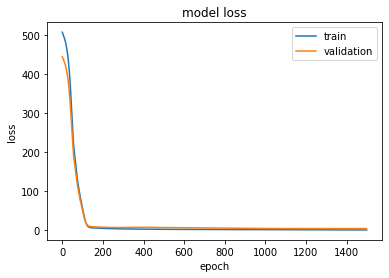

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [14]:
# evaluate model
if ieta in range (26,28):
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]], 
                           X_test[:,np.r_[0:12,18]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24], 
               X_test[:,25]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30], 
                   X_test[:,31], X_test[:,32]]

else:
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30]]
    
preds = preds.reshape(preds.shape[1],preds.shape[0])

if ieta in range (26,28):
    n=7
else:
    n=6

for i in range (0,n):
    targets[i] = targets[i].reshape(targets[i].shape[0],1)
    uncorrected[i] = uncorrected[i].reshape(uncorrected[i].shape[0],1)
#print(preds[1])
#print(targets[1])
#print (uncorrected[1])

#print(len(targets[1]))
#print(len(uncorrected[1]))
#print(len(preds))
#print(targets[1])

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


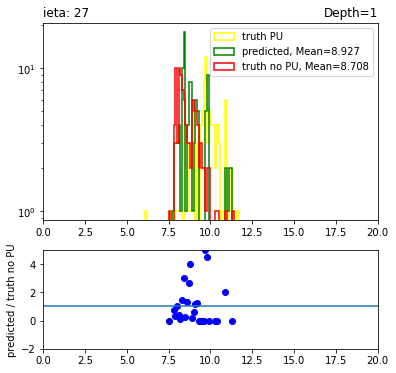

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


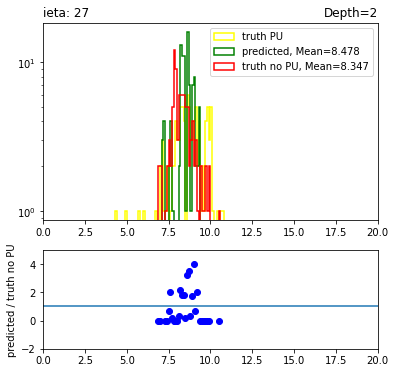

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


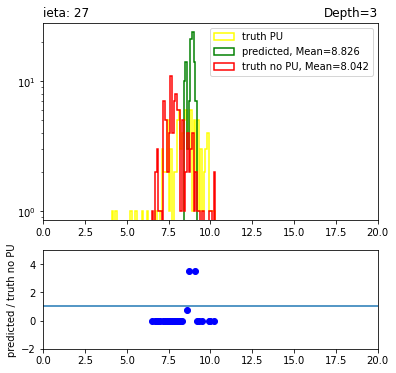

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


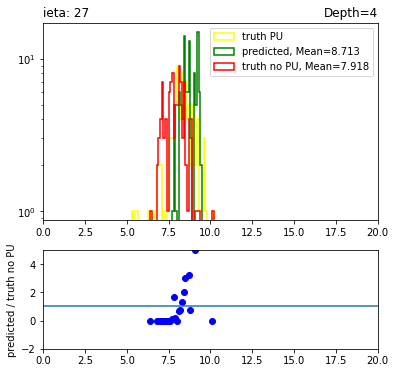

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


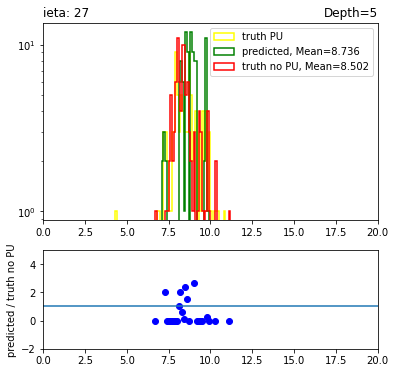

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


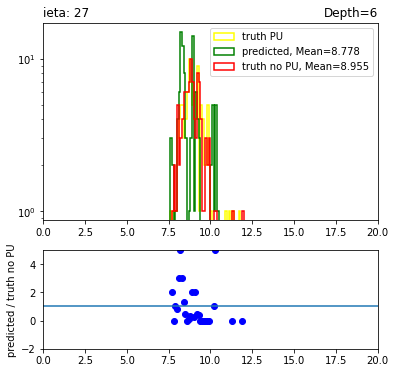

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


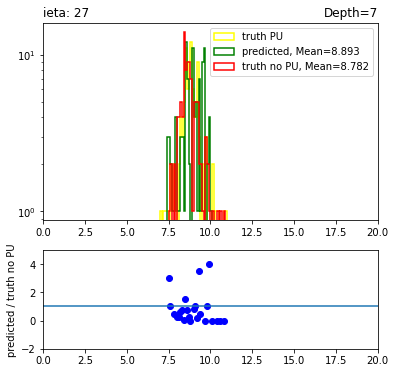

In [15]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(targets[j][:,i]),3)
    b=round(np.mean(preds[j]),3)
    ns, bins, patches = ax.hist([targets[j][:,i], preds[j], uncorrected[j][:,i]], 
                            histtype='step', bins=200,  range=(0,20), linewidth=1.5,
                            label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                            color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.png')
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.pdf')
    plt.show()


In [16]:
import statistics
b=(np.exp(preds[2])/10000)
print((np.exp(preds[0])/10000).mean())
print((np.exp(preds[1])/10000).mean())
print((np.exp(preds[2])/10000).mean())
print((np.exp(preds[3])/10000).mean())
print((np.exp(preds[4])/10000).mean())
print((np.exp(preds[5])/10000).mean())

1.1898504
0.543399
0.6953894
0.66769564
0.74347305
0.8778539


/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


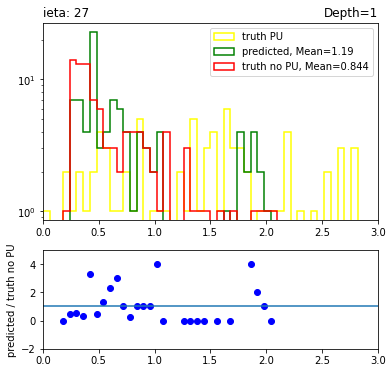

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


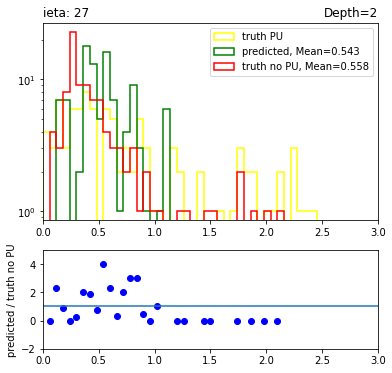

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


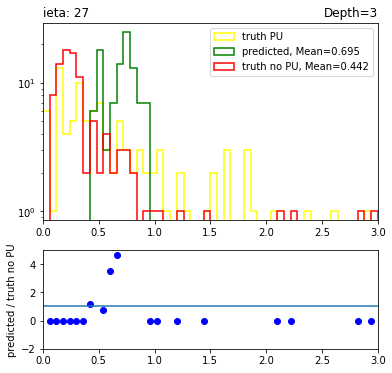

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


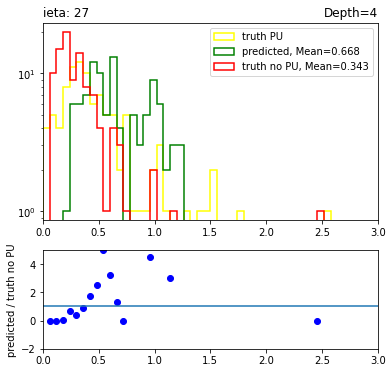

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


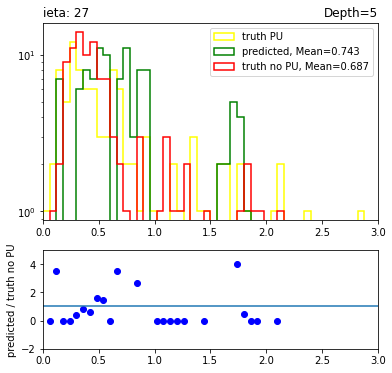

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


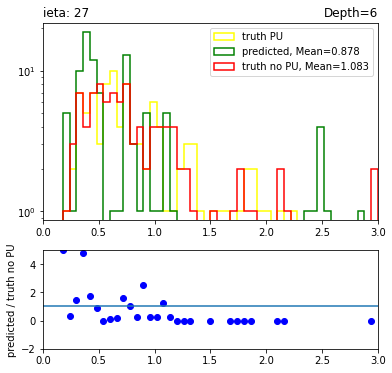

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


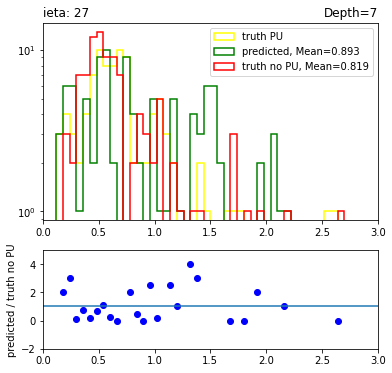

In [17]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(np.exp((targets[j][:,i]))/10000),3)
    b=round(np.mean(np.exp(preds[j])/10000),3)
    ns, bins, patches = ax.hist([(np.exp((targets[j][:,i]))/10000), (np.exp(preds[j])/10000),
                                 (np.exp(uncorrected[j][:,i])/10000)], histtype='step', bins=50,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')   
    plt.xlim(0,3)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 3], [1, 1])
    plt.xlim(0,3)
    plt.ylim(-2,5)
    plt.savefig('nonLog/ieta'+str(ieta)+'_'+str(k)+'_nonLog.png')
    plt.savefig('nonLog/ieta'+str(ieta)+'_'+str(k)+'_nonLog.pdf')
    plt.show()
    



In [19]:
#save model
import os
if not os.path.exists('model'):
    os.makedirs('model')
model.save('model/model_ieta'+str(ieta)+'.h5')

In [20]:
import h5py
hf=h5py.File('model/model_ieta'+str(ieta)+'.h5','r')
hf.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>